In [1]:
#!/usr/bin/env python3
"""
Script for testing the SNNNumpy class with sample data
"""
# Standard libraries
import matplotlib.pyplot as plt
import numpy as np
import pathlib
# Local libraries
import spikingFT.startup
import spikingFT.utils.plotter
import spikingFT.utils.metrics


def get_ft_components(nsamples, data):
    """
    Return the real imaginary, and modulus of the np.fft of input data
    """
    ft_np = np.fft.fft(data[0, :])
    ft_np_comps = np.vstack((ft_np.real, ft_np.imag)).transpose()
    ft_np_norm = spikingFT.utils.metrics.simplify_ft(ft_np_comps)
    ft_real = ft_np_norm[:, 0]
    ft_imag = ft_np_norm[:, 1]
    ft_modulus = np.abs(ft_np)[1:int(nsamples/2)]
    ft_modulus -= ft_modulus.min()
    ft_modulus /= ft_modulus.max()
    return (ft_real, ft_imag, ft_modulus)


def plot_simulation(nsamples, sim_time, spikes, voltage):
    real_spikes = spikes[:, 0][1:int(nsamples/2)]
    imag_spikes = spikes[:, 1][1:int(nsamples/2)]

    # Plot S-FT result and reference result
    kwargs = {}
    kwargs["plot_names"] = ["voltages", "spikes"]
    kwargs["data"] = [
        voltage,
        (real_spikes, imag_spikes, 2*sim_time),
    ]
    sim_plotter = spikingFT.utils.plotter.SNNSimulationPlotter(**kwargs)
    fig = sim_plotter()
    fig.savefig("./simulation_plot.pdf", dpi=150, bbox_inches='tight')


def plot_error(nsamples, data, output, spikes, rel_error):
    """
    Plot relative error histograms
    """
    spikes = spikingFT.utils.metrics.simplify_ft(spikes[:, :, -1])
    real_spikes = output[:, 0][1:int(nsamples/2)]
    imag_spikes = output[:, 1][1:int(nsamples/2)]
    simplified_output = spikingFT.utils.metrics.simplify_ft(output)
    sft_real = simplified_output[:, 0]
    sft_imag = simplified_output[:, 1]
    sft_modulus = np.sqrt(real_spikes**2 + imag_spikes**2)
    sft_modulus -= sft_modulus.min()
    sft_modulus /= sft_modulus.max()
    ft_real, ft_imag, ft_modulus = get_ft_components(nsamples, data)

    real_error = rel_error[:, 0]
    imag_error = rel_error[:, 1]
    abs_error = (real_error + imag_error) / 2
    kwargs = {}
    kwargs["plot_names"] = ["real_spectrum", "imag_spectrum", "modulus"]
    kwargs["data"] = [
        (sft_real, ft_real, real_error),
        (sft_imag, ft_imag, imag_error),
        (sft_modulus, ft_modulus, abs_error)
    ]
    error_plotter = spikingFT.utils.plotter.RelErrorPlotter(**kwargs)
    fig = error_plotter()
    return fig


def plot_single_chirp(sim_handler, plot_spikes=True):
    nsamples = sim_handler.snn.nsamples
    sim_time = sim_handler.config["snn_config"]["sim_time"]
    spikes = sim_handler.snn.spikes
    voltage = sim_handler.snn.voltage
    if plot_spikes:
        plot_simulation(nsamples, sim_time, spikes, voltage)
    rel_error = sim_handler.metrics["rel_error"]
    fig = plot_error(nsamples, sim_handler.data, sim_handler.output, spikes, rel_error)
    return fig


def special_cases(filename="../config/experiment_special_cases.json"):
    sim_handler = spikingFT.startup.startup(filename, autorun=False)
    n_chirps = sim_handler.config["data"]["chirps_per_frame"]
    platform = sim_handler.config["snn_config"]["framework"]
    mode = sim_handler.config["snn_config"]["mode"]
    figs = []
    folder_path = "./{}_{}_results/".format(mode, platform)
    pathlib.Path(folder_path).mkdir(parents=True, exist_ok=True)
    for chirp_n in range(n_chirps):
        sim_handler.run(chirp_n)
        figs.append(plot_single_chirp(sim_handler, False))
        #figs[-1].savefig("./{}/error_plot_{}.pdf".format(folder_path, chirp_n),
        #                dpi=150, bbox_inches='tight')
        plt.show()
    return


def main(conf_filename="../config/test_experiment_brian.json"):
    # Instantiate a simulation handler and run spiking FT with sample data
    sim_handler = spikingFT.startup.startup(conf_filename)
    fig = plot_single_chirp(sim_handler)
    fig.savefig("./error_plot.pdf", dpi=150, bbox_inches='tight')
    return

Brian2 cannot be found. It will not be possible to run simulation with Brian2.


INFO: Starting up spiking-FT:
- Configuration file: ../config/experiment_special_cases.json
- Simulation time: 127
- Time step: 1
- FT mode: fft
- Framework: radix4loihi
- Test performance: False
INFO: Loading data
INFO: Data loaded:
- Source: TI_sensor_special
- Nº frames: 1
- Nº chirps: 4
- Nº samples: 256
- Nº antennas: 1
INFO: Encoding data to spikes
INFO: Initializing SNN simulation
DEBUG: Creating Compartments ...
DEBUG: Creating CompartmentPrototypes of Layer 0 ...
DEBUG: Creating CompartmentPrototypes of Layer 1 ...
DEBUG: Creating CompartmentPrototypes of Layer 2 ...
DEBUG: Creating CompartmentPrototypes of Layer 3 ...
DEBUG: Done.
DEBUG: Creating ConnectionPrototype ...
DEBUG: Creating auxillary neurons ...
DEBUG: Clock neuron connected to layer 0.
DEBUG: Reset neuron connected to layer 0.
DEBUG: Clock neuron connected to layer 1.
DEBUG: Reset neuron connected to layer 1.
DEBUG: Clock neuron connected to layer 2.
DEBUG: Reset neuron connected to layer 2.
DEBUG: Clock neuron c

INFO:DRV:  SLURM is being run in background
INFO:DRV:  Connecting to 10.212.98.110:41593
INFO:DRV:      Host server up..............Done 0.32s
INFO:DRV:      Encoding axons/synapses.....Done 2.53s
INFO:DRV:      Compiling Embedded snips....Done 0.47s
INFO:DRV:      Compiling MPDS Registers....Done 3.05ms
INFO:HST:  Args chip=0 cpu=0 /homes/nreeb/loihi/lib/python3.8/site-packages/nxsdk/driver/compilers/../../../temp/1633381330.1276739/launcher_chip0_lmt0.bin --chips=1 --epoch=0 --remote-relay=1 
INFO:HST:  Nx...
INFO:DRV:      Booting up..................Done 0.70s
INFO:DRV:      Encoding probes.............Done 5.36ms
INFO:DRV:      Transferring probes.........Done 0.05s
INFO:DRV:      Configuring registers.......Done 1.03s
INFO:DRV:      Transferring spikes.........Done 0.07s
INFO:DRV:      Executing...................Done 17.22s
INFO:DRV:      Processing timeseries.......Done 10.64s
INFO:DRV:  Executor: 762 timesteps.........Done 33.10s


INFO: Finishing Loihi execution. Disconnecting board ...


INFO:HST:  chip=0 cpu=0 halted, status=0x0


DEBUG: Done.
DEBUG: Run finished.
DEBUG: Resulting RMSE: 0.12653203716592243
INFO: Execution finished


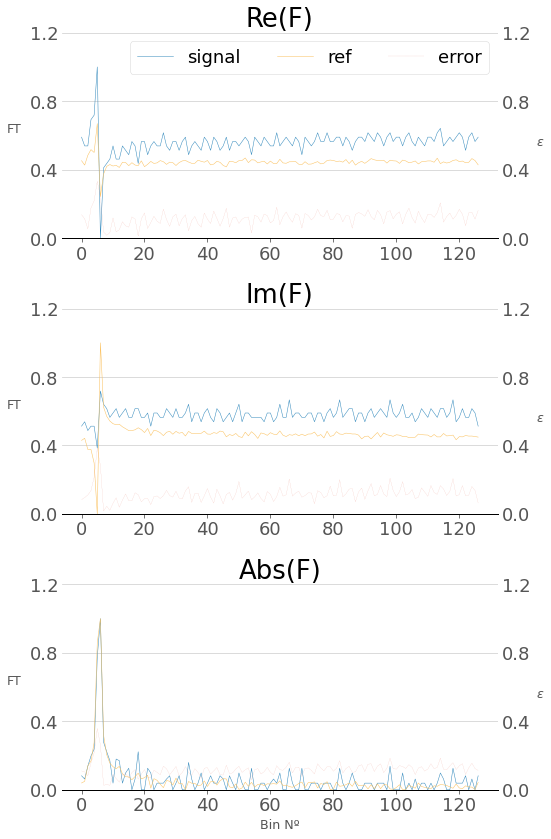

INFO: Loading data
INFO: Data loaded:
- Source: TI_sensor_special
- Nº frames: 1
- Nº chirps: 4
- Nº samples: 256
- Nº antennas: 1
INFO: Encoding data to spikes
INFO: Initializing SNN simulation
DEBUG: Creating Compartments ...
DEBUG: Creating CompartmentPrototypes of Layer 0 ...
DEBUG: Creating CompartmentPrototypes of Layer 1 ...
DEBUG: Creating CompartmentPrototypes of Layer 2 ...
DEBUG: Creating CompartmentPrototypes of Layer 3 ...
DEBUG: Done.
DEBUG: Creating ConnectionPrototype ...
DEBUG: Creating auxillary neurons ...
DEBUG: Clock neuron connected to layer 0.
DEBUG: Reset neuron connected to layer 0.
DEBUG: Clock neuron connected to layer 1.
DEBUG: Reset neuron connected to layer 1.
DEBUG: Clock neuron connected to layer 2.
DEBUG: Reset neuron connected to layer 2.
DEBUG: Clock neuron connected to layer 3.
DEBUG: Reset neuron connected to layer 3.
DEBUG: Done.
DEBUG: Creating Probes ...
DEBUG: Creating Probes of Layer 0 ...
DEBUG: Creating Probes of Layer 1 ...
DEBUG: Creating P

In [ ]:
special_cases()